#Project 5: Interpolation

$Ankit Rijal$

$Min Sun Kim$

$Tylar Gifford$

$CPSMA - 441301$

$Dr. Nicolas Jacob$

First, I am going to import Gauss-Jordan algorithm from our previous project. 

In [ ]:
#importing necessary modules
import math
import numpy as np

def swap(matrix, row1, row2):
  swapped_matrix = []
  size = len(matrix)      #to find the size of a matrix
  for i in range(size):   #using loop to go through each row
    if i == row1:
      swapped_matrix.append(matrix[row2,:])   
    elif i == row2:
      swapped_matrix.append(matrix[row1,:])
    else:
      swapped_matrix.append(matrix[i,:])
  return np.array(swapped_matrix)


def add_rows(matrix, target_row, adding_row, multiplier):
  added_matrix = []
  size = len(matrix)
  for i in range(size):   #using loop to go through each row
    if i == target_row:
      old_row = matrix[target_row,:]
      adding_values = multiplier * matrix[adding_row,:]
      new_row = old_row + adding_values
      added_matrix.append(new_row)
    else:
      added_matrix.append(matrix[i,:])
  return np.array(added_matrix)

def multiply(matrix, target_row, constant):
  new_matrix = []
  size = len(matrix)
  for i in range(size):   #using loop to go through each row
    if i == target_row:
      new_matrix.append(constant * matrix[target_row,:])
    else:
      new_matrix.append(matrix[i,:])
  return np.array(new_matrix)

def max_value_row(matrix, column):
  col = matrix[column:,column]
  max = 0
  for i in range(len(col)):
    if col[max] < col[i]:
      max = i
  max_row = max + column
  return max_row

def gaussJordan(matrix):
  for i in range(len(matrix)):  #using loop to go through each row
    pos = max_value_row(matrix, i)  #using max_value_row function to find the row with largest leftmost value   
    matrix = swap(matrix, pos, i)   #swapping current row with row found on previous step   
    constant = 1/matrix[i,i]        
    matrix = multiply(matrix,i,constant)  #using multiply function to make the diagonal 1
    for column in range(0,i):             
      matrix = add_rows(matrix,column,i,-matrix[column,i])    #using add_rows function to make all values except diagonal 0
    for column in range(i+1,len(matrix)):
      matrix = add_rows(matrix,column,i,-matrix[column,i])    #using add_rows function to make all values except diagonal 0
  return np.array(matrix)

##Direct Method

Function used: 
$$
2x^3+3x^2-4x+10
$$

Now, I am going to list some functions for direct method of interpolation. 

In [ ]:
def createRow(input,output,order):
  array = []
  for i in range(order+1):
    array.append(input**i)
  array.append(output)
  return array

def augmented_matrix(data):
  matrix = []
  order = len(data)-1
  for i in range(len(data)):
    matrix.append(createRow(data[i][0],data[i][1],order))
  return np.array(matrix)


In [ ]:
def direct_interpolation(data):
  answer = gaussJordan(augmented_matrix(data))[:,-1]
  end = -len(answer)-1
  degree = len(answer)-1
  function = ''
  super_map = {"0": "⁰", "1": "¹", "2": "²", "3": "³", "4": "⁴", "5": "⁵", "6": "⁶", "7": "⁷", "8": "⁸", "9": "⁹"}

  for i in range(-1,end,-1):
    power = super_map.get(str(degree))
    function += f"+ ({(answer[i])})x{power} "
    degree -= 1

  print("The function is:")
  print(function)


In [ ]:
data =[[0,10],[1,11],[2,30],[3,79],[4,170]]
direct_interpolation(data)

The function is:
+ (0.0)x⁴ + (2.0)x³ + (3.0)x² + (-4.0)x¹ + (10.0)x⁰ 


In [ ]:
def direct_spline(data, x_value):
  coefficient = gaussJordan(augmented_matrix(data))[:,-1]
  answer = 0
  for i in range(len(coefficient)):
    value = coefficient[i]*(x_value)**i
    answer += value
  return answer

In [ ]:
direct_spline(data, 3)

79.0

Text(0.5, 1.0, 'Direct_spline Graph')

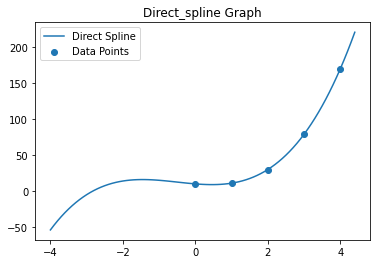

In [ ]:
from matplotlib import pyplot as plot

import numpy as npy

x = npy.arange( -4,4.5,.1)

fig, ax = plot.subplots()

ax.plot(x, direct_spline(data, x), label='DS')

ax.scatter(npy.array(data)[:,0],npy.array(data)[:,1])

ax.legend(["Direct Spline", "Data Points"])

ax.set_title('Direct_spline Graph')

###Linear Splines

Splines are the piecewise functions of interpolation and the linear splines represent a set of line segments between the two adjacent data points. 

In [ ]:
import numpy as np
import math

def even_interval(function,lower,upper,numberOfDivisions):
  interval = (upper - lower)/(numberOfDivisions - 1)
  points = []
  for i in range(numberOfDivisions):
    x_value = lower + i*interval
    points.append([x_value,function(x_value)])
  return np.array(points)

def slope(init_point, final_point):
  return (final_point[1]-init_point[1])/(final_point[0]-init_point[0])

In [ ]:
def linerSpline(points,input):
  x = points[:,0]
  y = points[:,1]
  for i in range(len(x)-1):
    if (x[i]< input) & (input < x[i+1]):
      return y[i]+ slope(points[i,:],points[i+1,:])*(input - x[i])
    else:
      continue

In [ ]:
points = divideIntervalEvenly(np.cos,0,np.pi,5)

linerSpline(points,1)

NameError: ignored